# **1. 준비된 Custom Dataset 가져오기**

**1-1. 데이터 가져오기**
- VM에 dataset.zip 파일로 업로드 후 압축 풀기

In [ ]:
import zipfile

with zipfile.ZipFile('/content/nut_data.zip') as target_file:
    target_file.extractall('/content/nut_data')

In [ ]:
!pip install labelme2yolo

In [ ]:
import labelme2yolo

In [ ]:
!labelme2yolo --json_dir /content/nut_data --val_size 0.2

INFO:labelme2yolo:Searching label list from json files ...
INFO:labelme2yolo:Converting train set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
INFO:labelme2yolo:Converting val set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100% 0:00:00
INFO:labelme2yolo:Converting test set ...
Converting... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━   0% -:--:--


**1-2. yaml파일 확인하기**
- yaml 파일은 모델학습에 사용되는 데이터의 위치, 클래스의 수, 클래스명의 정보를 가지고 있다.

In [ ]:
!cat /content/nut_data/YOLODataset/dataset.yaml

train: /content/nut_data/YOLODataset/images/train/
val: /content/nut_data/YOLODataset/images/val/
nc: 15
names: ["Pine nut", "Acorns", "Cashew nut", "Walnut", "Almond", "Macadamia", "Pistachio", "Chestnut", "Sunflower seed", "Peanut", "Brazilian nut", "Pumpkin seed", "Ginkgo nut", "Chestnut bur", "Pecan"]

# **2. Custom yaml 파일을 만들자.**

In [ ]:
# PyYAML을 설치하자
!pip install PyYAML

In [ ]:
import yaml

data_cf = {'train' : '/content/nut_data/YOLODataset/images/train',
           'val' : '/content/nut_data/YOLODataset/images/val',
           'names' : ["Almond", "Cashew nut", "Acorns", "Pine nut", "Pumpkin seed", "Walnut", "Brazilian nut", "Chestnut", "Sunflower seed", "Macadamia", "Peanut", "Pistachio", "Ginkgo nut", "Pecan", "Chestnut bur"],
           'nc' : 15 }

# nut_data.yaml 이란 이름으로 custom yaml 파일을 만든다.
with open('/content/nut_data/YOLODataset/nut_data.yaml', 'w') as f:
  yaml.dump(data_cf, f)

# nut_data.yaml 확인
with open('/content/nut_data/YOLODataset/nut_data.yaml', 'r') as f:
  nut_yaml = yaml.safe_load(f)
  display(nut_yaml)

{'names': ['Almond',
  'Cashew nut',
  'Acorns',
  'Pine nut',
  'Pumpkin seed',
  'Walnut',
  'Brazilian nut',
  'Chestnut',
  'Sunflower seed',
  'Macadamia',
  'Peanut',
  'Pistachio',
  'Ginkgo nut',
  'Pecan',
  'Chestnut bur'],
 'nc': 15,
 'train': '/content/nut_data/YOLODataset/images/train',
 'val': '/content/nut_data/YOLODataset/images/val'}

# **3. YOLOv8을 사용하기 위한 Setup(셋업)**

In [ ]:
# ultralytics 설치
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 3.4 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.

In [ ]:
# ultralytics 를 불러오고 체크
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 34.5/78.2 GB disk)


# **4. Custom YOLO Training(학습)**

**Segmentation 모델로 사용할 수 있는 모델의 종류**

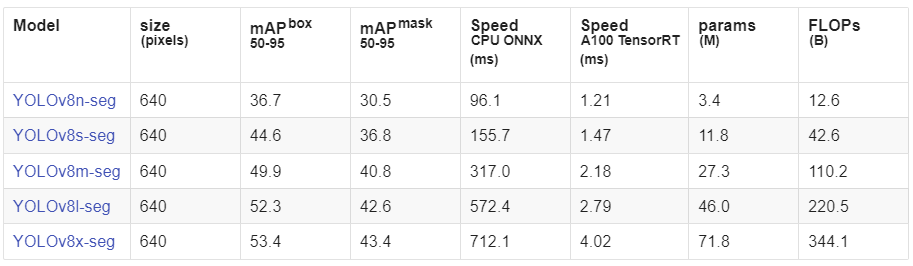

In [ ]:
# ultralytics에서 YOLO 모듈을 불러옴
from ultralytics import YOLO
# yolov8n-seg.pt 모델의 아키텍처와 가중치을 함께 불러옴
model = YOLO('yolov8n-seg.pt')

100%|██████████| 6.74M/6.74M [00:00<00:00, 236MB/s]


In [ ]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))
# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 80
{0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell p

**불러온 모델 아키텍처를 이용하여 우리가 준비한 Custom Dataset으로 학습을 시켜보자.**

In [12]:
model.train(data='/content/nut_data/YOLODataset/nut_data.yaml', epochs=100, patience=10, batch=8, imgsz=640)

Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/nut_data/YOLODataset/nut_data.yaml, epochs=100, time=None, patience=10, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, 

100%|██████████| 755k/755k [00:00<00:00, 84.2MB/s]


Overriding model.yaml nc=80 with nc=15

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 6.25M/6.25M [00:00<00:00, 238MB/s]


AMP: checks passed ✅


train: Scanning /content/nut_data/YOLODataset/labels/train... 216 images, 0 backgrounds, 0 corrupt: 100%|██████████| 216/216 [00:08<00:00, 24.34it/s]

train: New cache created: /content/nut_data/YOLODataset/labels/train.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
val: Scanning /content/nut_data/YOLODataset/labels/val... 54 images, 0 backgrounds, 0 corrupt: 100%|██████████| 54/54 [00:02<00:00, 20.15it/s]

val: New cache created: /content/nut_data/YOLODataset/labels/val.cache


Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000526, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/segment/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.67G      1.181      1.633      5.142     0.8816         61        640: 100%|██████████| 27/27 [00:56<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.01it/s]

                   all         54        183          0          0          0          0          0          0          0          0



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.63G      1.226       1.42      4.302      0.845         43        640: 100%|██████████| 27/27 [00:52<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all         54        183    0.00823     0.0631     0.0127    0.00481     0.0207      0.143     0.0248     0.0144



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.63G      1.137      1.245      3.547     0.8283         35        640: 100%|██████████| 27/27 [00:55<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.58it/s]

                   all         54        183     0.0163      0.531     0.0736     0.0486     0.0173      0.581     0.0845     0.0526



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.62G      1.101      1.181      3.143     0.8372         38        640: 100%|██████████| 27/27 [00:56<00:00,  2.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.02it/s]

                   all         54        183      0.696     0.0778      0.123     0.0825      0.692     0.0718      0.121     0.0709



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.63G      1.076      1.156      2.903     0.8454         47        640: 100%|██████████| 27/27 [00:53<00:00,  1.97s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.38it/s]


                   all         54        183      0.589      0.181      0.121     0.0891      0.588      0.177      0.119     0.0767

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.63G     0.9794      1.073      2.802     0.8365         42        640: 100%|██████████| 27/27 [00:51<00:00,  1.91s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.75it/s]

                   all         54        183      0.539      0.248       0.15      0.115       0.54      0.251      0.149      0.103



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      7/100       1.5G     0.9913      1.028      2.667     0.8446         57        640: 100%|██████████| 27/27 [00:51<00:00,  1.90s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]


                   all         54        183       0.51      0.221       0.13     0.0946       0.51      0.222      0.127     0.0757

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.66G      1.019      1.051      2.651     0.8391         22        640: 100%|██████████| 27/27 [00:54<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.41it/s]

                   all         54        183      0.366      0.262      0.132      0.097      0.365      0.251       0.13     0.0832



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.63G     0.9649      1.042      2.455      0.832         36        640: 100%|██████████| 27/27 [00:50<00:00,  1.89s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.21it/s]


                   all         54        183      0.436       0.26      0.142      0.105      0.435       0.26      0.139     0.0844

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     10/100      1.61G     0.9332      1.006      2.312     0.8306         34        640: 100%|██████████| 27/27 [00:54<00:00,  2.02s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]

                   all         54        183      0.327      0.263      0.167      0.123      0.325      0.259      0.161     0.0983



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     11/100       1.6G     0.9087     0.9327      2.271     0.8269         28        640: 100%|██████████| 27/27 [00:51<00:00,  1.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.34it/s]

                   all         54        183      0.414      0.305      0.178      0.132       0.41      0.298      0.171      0.111



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.53G     0.9273     0.9982       2.24     0.8387         46        640: 100%|██████████| 27/27 [00:55<00:00,  2.04s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.01it/s]


                   all         54        183      0.407      0.252      0.187      0.136      0.405      0.247      0.183      0.111

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.64G     0.8843     0.9877      2.185     0.8267         43        640: 100%|██████████| 27/27 [00:54<00:00,  2.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.45it/s]

                   all         54        183      0.336      0.299      0.177      0.128      0.332      0.294      0.172      0.109



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     14/100       1.6G     0.9023      0.946      2.051     0.8352         43        640: 100%|██████████| 27/27 [00:53<00:00,  1.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.75it/s]


                   all         54        183      0.345       0.27      0.199      0.149      0.349      0.239      0.195      0.126

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.61G     0.8864     0.9377      1.917     0.8257         70        640: 100%|██████████| 27/27 [00:52<00:00,  1.95s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.26it/s]

                   all         54        183      0.528      0.261      0.231      0.174      0.529       0.26      0.228      0.147



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.62G     0.8606     0.9493      1.945     0.8264         32        640: 100%|██████████| 27/27 [00:55<00:00,  2.05s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.44it/s]

                   all         54        183      0.442      0.262      0.244      0.182      0.434      0.253      0.233      0.149



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     17/100       1.5G     0.8342     0.9915      1.835     0.8278         26        640: 100%|██████████| 27/27 [00:54<00:00,  2.03s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.65it/s]

                   all         54        183      0.388      0.324      0.255      0.189      0.387      0.323       0.25      0.153



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.62G     0.8241     0.9129      1.836     0.8259         37        640: 100%|██████████| 27/27 [00:50<00:00,  1.87s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.36it/s]

                   all         54        183      0.374       0.31      0.278      0.207      0.373      0.311      0.276      0.171



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.61G      0.804     0.8673      1.673     0.8161         36        640: 100%|██████████| 27/27 [00:48<00:00,  1.80s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all         54        183      0.612      0.241      0.279      0.207      0.606      0.237      0.273      0.169
                   all         54        183      0.612      0.241      0.279      0.207      0.606      0.237      0.273      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     20/100       1.6G     0.8364     0.8979      1.735      0.822         49        640: 100%|██████████| 27/27 [00:52<00:00,  1.94s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         54        183      0.183      0.334      0.277      0.207      0.414      0.289      0.273      0.177
                   all         54        183      0.183      0.334      0.277      0.207      0.414      0.289      0.273      0.177



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     21/100       1.6G     0.8243     0.8706       1.69     0.8125         47        640: 100%|██████████| 27/27 [00:50<00:00,  1.86s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]



                   all         54        183      0.484      0.271      0.287      0.209      0.544      0.256      0.268      0.155
                   all         54        183      0.484      0.271      0.287      0.209      0.544      0.256      0.268      0.155

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     22/100       1.6G     0.8132     0.8823       1.66     0.8236         45        640: 100%|██████████| 27/27 [00:53<00:00,  1.99s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.74it/s]



                   all         54        183      0.458      0.325      0.305      0.231       0.64      0.254      0.303      0.198
                   all         54        183      0.458      0.325      0.305      0.231       0.64      0.254      0.303      0.198

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.51G     0.7876     0.8206      1.591      0.822         59        640: 100%|██████████| 27/27 [00:54<00:00,  2.03s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all         54        183      0.489       0.29      0.293      0.222      0.487      0.287       0.29      0.183
                   all         54        183      0.489       0.29      0.293      0.222      0.487      0.287       0.29      0.183



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.62G     0.8201     0.9007      1.502     0.8248         43        640: 100%|██████████| 27/27 [00:54<00:00,  2.01s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]



                   all         54        183      0.368      0.276      0.252      0.185      0.354      0.267      0.244      0.157
                   all         54        183      0.368      0.276      0.252      0.185      0.354      0.267      0.244      0.157

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     25/100      1.61G     0.7922     0.8341      1.529     0.8128         40        640: 100%|██████████| 27/27 [00:53<00:00,  1.98s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.63it/s]

                   all         54        183      0.435      0.344      0.298       0.23      0.432      0.341      0.293      0.184
                   all         54        183      0.435      0.344      0.298       0.23      0.432      0.341      0.293      0.184



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     26/100      1.62G     0.8004     0.9092      1.482     0.8158         31        640: 100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.48it/s]

                   all         54        183       0.67      0.238      0.303      0.234      0.664      0.234      0.298      0.193
                   all         54        183       0.67      0.238      0.303      0.234      0.664      0.234      0.298      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     27/100      1.62G     0.8126     0.9193      1.514     0.8194         37        640: 100%|██████████| 27/27 [00:54<00:00,  2.03s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.04it/s]

                   all         54        183       0.67      0.236       0.31       0.23      0.529      0.258      0.303      0.182
                   all         54        183       0.67      0.236       0.31       0.23      0.529      0.258      0.303      0.182



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     28/100      1.63G     0.7938     0.8146      1.343     0.8147         46        640: 100%|██████████| 27/27 [00:55<00:00,  2.05s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.30it/s]



                   all         54        183      0.563      0.289      0.296      0.224      0.558      0.282      0.288      0.179
                   all         54        183      0.563      0.289      0.296      0.224      0.558      0.282      0.288      0.179

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     29/100       1.6G     0.7841     0.8677      1.426     0.8233         28        640: 100%|██████████| 27/27 [00:56<00:00,  2.09s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

                   all         54        183      0.651      0.223       0.29      0.219      0.646      0.218      0.284      0.169
                   all         54        183      0.651      0.223       0.29      0.219      0.646      0.218      0.284      0.169



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     30/100      1.61G     0.7853     0.8111       1.33     0.8207         47        640: 100%|██████████| 27/27 [00:51<00:00,  1.91s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.22it/s]

                   all         54        183      0.489      0.256      0.306      0.237      0.481      0.249      0.294      0.188
                   all         54        183      0.489      0.256      0.306      0.237      0.481      0.249      0.294      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     31/100       1.6G     0.7958     0.8799      1.263     0.8222         48        640: 100%|██████████| 27/27 [00:50<00:00,  1.86s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.19it/s]

                   all         54        183      0.484      0.281      0.309      0.236      0.481      0.275      0.298      0.188
                   all         54        183      0.484      0.281      0.309      0.236      0.481      0.275      0.298      0.188



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     32/100      1.63G      0.757      0.837      1.343     0.8156         40        640: 100%|██████████| 27/27 [00:56<00:00,  2.08s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.91it/s]



                   all         54        183      0.486      0.262      0.304      0.236      0.484       0.26      0.298      0.198
                   all         54        183      0.486      0.262      0.304      0.236      0.484       0.26      0.298      0.198

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     33/100      1.63G     0.7471     0.8063      1.249     0.8114         40        640: 100%|██████████| 27/27 [00:54<00:00,  2.01s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.70it/s]

                   all         54        183      0.308      0.323      0.291      0.222      0.305       0.32      0.286      0.176
                   all         54        183      0.308      0.323      0.291      0.222      0.305       0.32      0.286      0.176



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     34/100      1.58G     0.7629     0.8218      1.192     0.8168         27        640: 100%|██████████| 27/27 [00:54<00:00,  2.01s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.85it/s]



                   all         54        183      0.485      0.277      0.316      0.243       0.48      0.271      0.308      0.193
                   all         54        183      0.485      0.277      0.316      0.243       0.48      0.271      0.308      0.193

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     35/100       1.6G     0.7947     0.8594      1.244     0.8174         46        640: 100%|██████████| 27/27 [00:52<00:00,  1.95s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.52it/s]

                   all         54        183      0.243      0.394      0.331      0.253      0.239      0.391      0.323       0.21
                   all         54        183      0.243      0.394      0.331      0.253      0.239      0.391      0.323       0.21



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     36/100      1.64G     0.7646     0.7935      1.107     0.8176         47        640: 100%|██████████| 27/27 [00:55<00:00,  2.06s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.47it/s]

                   all         54        183      0.274      0.372      0.299      0.237      0.272      0.367      0.293      0.191
                   all         54        183      0.274      0.372      0.299      0.237      0.272      0.367      0.293      0.191



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     37/100      1.63G     0.7569      0.822      1.141     0.8064         57        640: 100%|██████████| 27/27 [00:52<00:00,  1.93s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.74it/s]

                   all         54        183      0.458       0.29      0.331      0.263      0.449       0.28      0.321      0.217
                   all         54        183      0.458       0.29      0.331      0.263      0.449       0.28      0.321      0.217



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     38/100      1.63G      0.769     0.8802      1.203     0.8173         38        640: 100%|██████████| 27/27 [00:49<00:00,  1.84s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.46it/s]

                   all         54        183       0.48      0.283      0.329      0.258      0.473      0.275      0.322      0.209
                   all         54        183       0.48      0.283      0.329      0.258      0.473      0.275      0.322      0.209



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     39/100      1.63G     0.7189     0.7929      1.057     0.8148         55        640: 100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.31it/s]

                   all         54        183      0.444      0.338      0.316      0.242      0.441      0.333      0.306      0.189
                   all         54        183      0.444      0.338      0.316      0.242      0.441      0.333      0.306      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     40/100      1.65G     0.7403     0.8297      1.073     0.8087         50        640: 100%|██████████| 27/27 [00:55<00:00,  2.04s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.33it/s]

                   all         54        183      0.493      0.321      0.314      0.238      0.489      0.317      0.309      0.193
                   all         54        183      0.493      0.321      0.314      0.238      0.489      0.317      0.309      0.193



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     41/100      1.63G     0.7174      0.763     0.9831     0.8133         64        640: 100%|██████████| 27/27 [00:48<00:00,  1.80s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

                   all         54        183       0.47      0.348      0.306      0.234      0.467      0.344        0.3      0.189
                   all         54        183       0.47      0.348      0.306      0.234      0.467      0.344        0.3      0.189



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     42/100      1.64G     0.7532     0.7927      1.096     0.8105         30        640: 100%|██████████| 27/27 [00:53<00:00,  1.97s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00:00,  1.79it/s]

                   all         54        183      0.417      0.329      0.316      0.246      0.414      0.324      0.311      0.213
                   all         54        183      0.417      0.329      0.316      0.246      0.414      0.324      0.311      0.213



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     43/100       1.6G     0.7872     0.8767      1.079     0.8077         51        640: 100%|██████████| 27/27 [00:53<00:00,  1.99s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.20it/s]



                   all         54        183       0.41      0.319      0.301      0.234      0.406      0.314      0.291      0.189
                   all         54        183       0.41      0.319      0.301      0.234      0.406      0.314      0.291      0.189

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     44/100       1.6G     0.7452     0.7868      1.047     0.8075         42        640: 100%|██████████| 27/27 [00:54<00:00,  2.01s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.72it/s]



                   all         54        183      0.335      0.342       0.31      0.243      0.333      0.341      0.306      0.206
                   all         54        183      0.335      0.342       0.31      0.243      0.333      0.341      0.306      0.206

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     45/100      1.63G     0.7611      0.829      1.039     0.8084         26        640: 100%|██████████| 27/27 [00:52<00:00,  1.96s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.55it/s]

                   all         54        183      0.346      0.336      0.315      0.242      0.346      0.332      0.307      0.194
                   all         54        183      0.346      0.336      0.315      0.242      0.346      0.332      0.307      0.194



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     46/100       1.6G     0.7571     0.7927     0.9617     0.8083         43        640: 100%|██████████| 27/27 [00:55<00:00,  2.06s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  3.09it/s]

                   all         54        183      0.418       0.32      0.324      0.256      0.416      0.319      0.322      0.214
                   all         54        183      0.418       0.32      0.324      0.256      0.416      0.319      0.322      0.214



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


     47/100       1.6G     0.7146     0.7807      0.964     0.8004         28        640: 100%|██████████| 27/27 [00:52<00:00,  1.95s/it]

                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.36it/s]

                   all         54        183      0.429      0.339      0.316      0.248      0.421      0.332      0.307      0.197
                   all         54        183      0.429      0.339      0.316      0.248      0.421      0.332      0.307      0.197
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 37, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.
EarlyStopping: Training stopped early as no improvement observed in last 10 epochs. Best results observed at epoch 37, best model saved as best.pt.
To update EarlyStopping(patience=10) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



47 epochs completed in 0.768 hours.

47 epochs completed in 0.768 hours.
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/last.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB
Optimizer stripped from runs/segment/train/weights/best.pt, 6.8MB

Validating runs/segment/train/weights/best.pt...

Validating runs/segment/train/weights/best.pt...
Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Ultralytics YOLOv8.2.66 🚀 Python-3.10.12 torch-2.3.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3,260,989 parameters, 0 gradients, 12.0 GFLOPs
YOLOv8n-seg summary (fused): 195 layers, 3,260,989 parameters, 0 gradients, 12.0 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:16<00:00,  4.04s/it]



                   all         54        183      0.457      0.289      0.331      0.263      0.448      0.278       0.32      0.216
                   all         54        183      0.457      0.289      0.331      0.263      0.448      0.278       0.32      0.216
                Almond          9         42      0.595      0.476      0.548      0.447      0.565      0.452      0.515      0.358
                Almond          9         42      0.595      0.476      0.548      0.447      0.565      0.452      0.515      0.358
            Cashew nut          9         22      0.502      0.273      0.346      0.197      0.502      0.273      0.346      0.171
            Cashew nut          9         22      0.502      0.273      0.346      0.197      0.502      0.273      0.346      0.171
                Acorns         11         23      0.473      0.783      0.631        0.5      0.421      0.696      0.574       0.36
                Acorns         11         23      0.473      0.783   

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79c896aeccd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79c896aeccd0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,

# **5. Training(학습) 결과 확인**

**학습 결과를 그래프로 저장한 파일을 통해 확인해 본다**

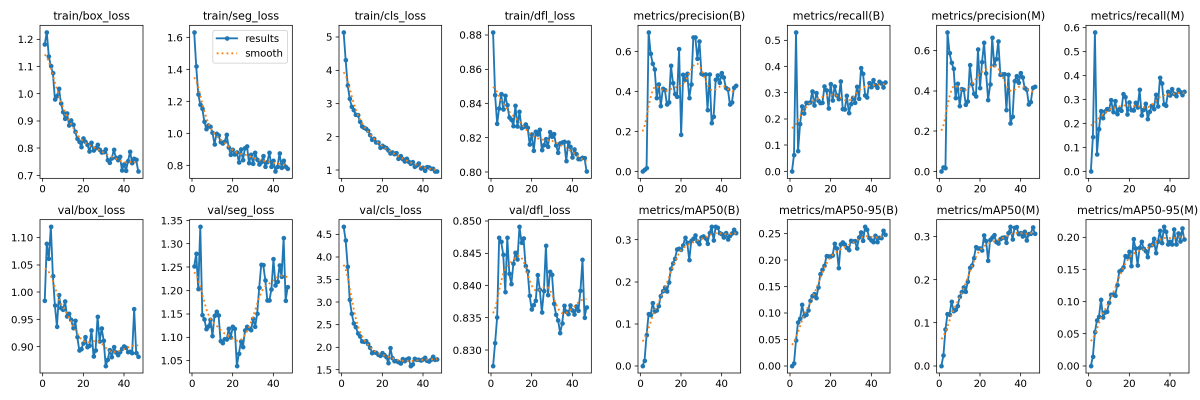

In [13]:
import cv2
from google.colab.patches import cv2_imshow

result_img = cv2.imread('/content/runs/segment/train/results.png')
fix_width = 1200
height,width = result_img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
result_img = cv2.resize(result_img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(result_img)

**Custom 모델이 분류할 수 있는 부류 확인**

In [14]:
# 모델이 분류할 수 있는 부류의 수 확인
print(type(model.names), len(model.names))
# 모델이 분류할 수 있는 부류 확인
print(model.names)

<class 'dict'> 15
{0: 'Almond', 1: 'Cashew nut', 2: 'Acorns', 3: 'Pine nut', 4: 'Pumpkin seed', 5: 'Walnut', 6: 'Brazilian nut', 7: 'Chestnut', 8: 'Sunflower seed', 9: 'Macadamia', 10: 'Peanut', 11: 'Pistachio', 12: 'Ginkgo nut', 13: 'Pecan', 14: 'Chestnut bur'}


# **6. Custom 모델로 Segmentation(분할)**

**Image Segmentation**

In [21]:
# 모델 예측
results = model.predict(source='/content/nut_data/YOLODataset/images/val/020f3c37d595c2428df21332752564ff.png', save=True)


image 1/1 /content/nut_data/YOLODataset/images/val/020f3c37d595c2428df21332752564ff.png: 480x640 2 Chestnuts, 14.4ms
Speed: 3.0ms preprocess, 14.4ms inference, 4.0ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/segment/train5


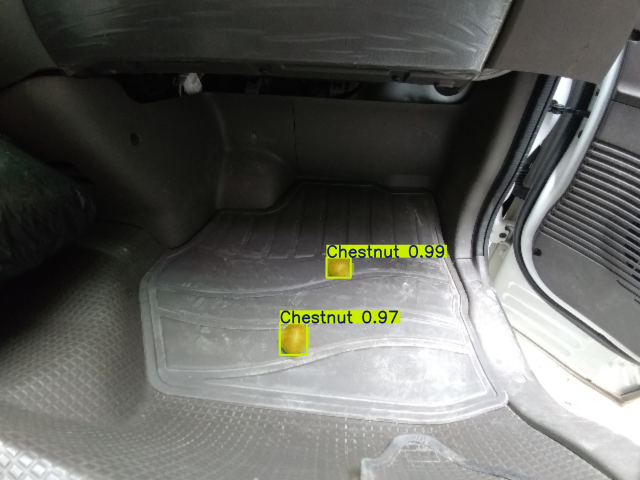

In [22]:
# 예측 이미지 확인
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('/content/runs/segment/train5/020f3c37d595c2428df21332752564ff.png')
fix_width = 640
height,width = img.shape[:2]
ratio = fix_width / width
demension = (fix_width, int(height*ratio))
img = cv2.resize(img, demension, interpolation=cv2.INTER_AREA)
cv2_imshow(img)